<a href="https://colab.research.google.com/github/Suemy-AZ/Modulo2_CL/blob/main/M2_Lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerías

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, f1_score, mean_absolute_error
%matplotlib inline  

# Cargando los datos

In [5]:
#Suemy Aquino Zumaya
#A00828585
#09/2022
#Módulo 2

from google.colab import drive  # importa libreria
drive.mount("/content/gdrive");  # utiliza comando
#!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive/7mo semestre/cvs"
#!ls

# Open the file and create the data frame
df = pd.read_csv('gender_classification_v7.csv')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/7mo semestre/cvs


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


Cargamos un data set de diferentes atributos físicos de las personas para predecir si son hombre o mujeres.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


Vemos que no hay valores nulos, sin embargo, la columna gender no es numérica por lo que la cambiaremos a valores categóricos de 0 y 1 para mejor manejo.

In [6]:
df[["gender"]]=np.where(df[["gender"]] == "Female", 1,0 )
#Mujer = 1
#Hombre= 0
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


# Visualizando los datos

Obtenemos la correlación entre los datos

In [16]:
corr_df=df.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794,0.010767
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328,-0.334125
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292,-0.277190
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303,-0.758502
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794,-0.744147
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312,-0.743319
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000,-0.754850
gender,0.010767,-0.334125,-0.277190,-0.758502,-0.744147,-0.743319,-0.754850,1.000000


Vemos como se relacionan entre sí por medio de gráficas.

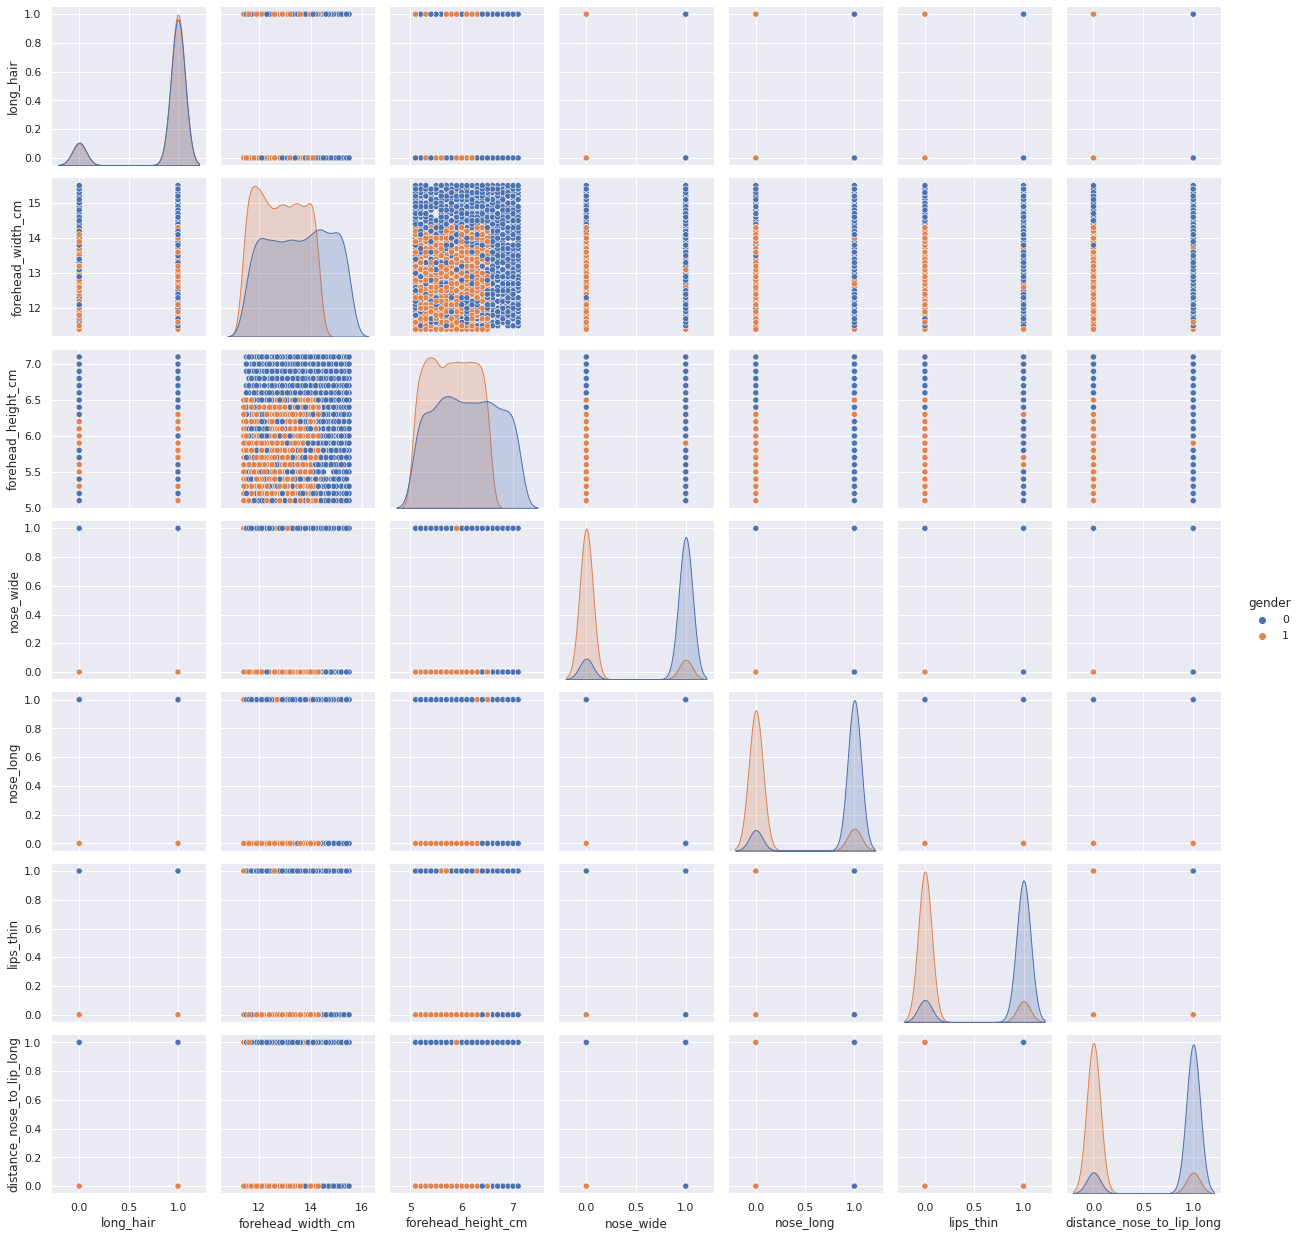

In [17]:
sns.set()

sns.pairplot(df, hue='gender');

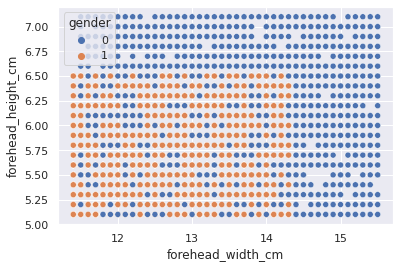

In [18]:
sns.scatterplot(x='forehead_width_cm', y ='forehead_height_cm' ,data = df , hue = 'gender')

Vemos que los datos poseen correlación con el género en buena manera y que existe cierta tendencia de los datos.

# Implementación de una solución
Implementaremos un Árbol de Decisión que nos indique si se trata de un hombre o una mujer.

In [42]:
#Dividimos entre variables dependientes e independientes
df_x=df.drop(columns="gender")
df_y=df["gender"]

#Seccionamos los datos en entrenamiento, pruebas y validación con una proporción de 70/25/5
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,train_size=0.7)
x_test, x_val, y_test, y_val = train_test_split(x_test,y_test,train_size=0.833)

#Árbol de desición
myTree = tree.DecisionTreeClassifier(criterion="entropy")
myTree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy')

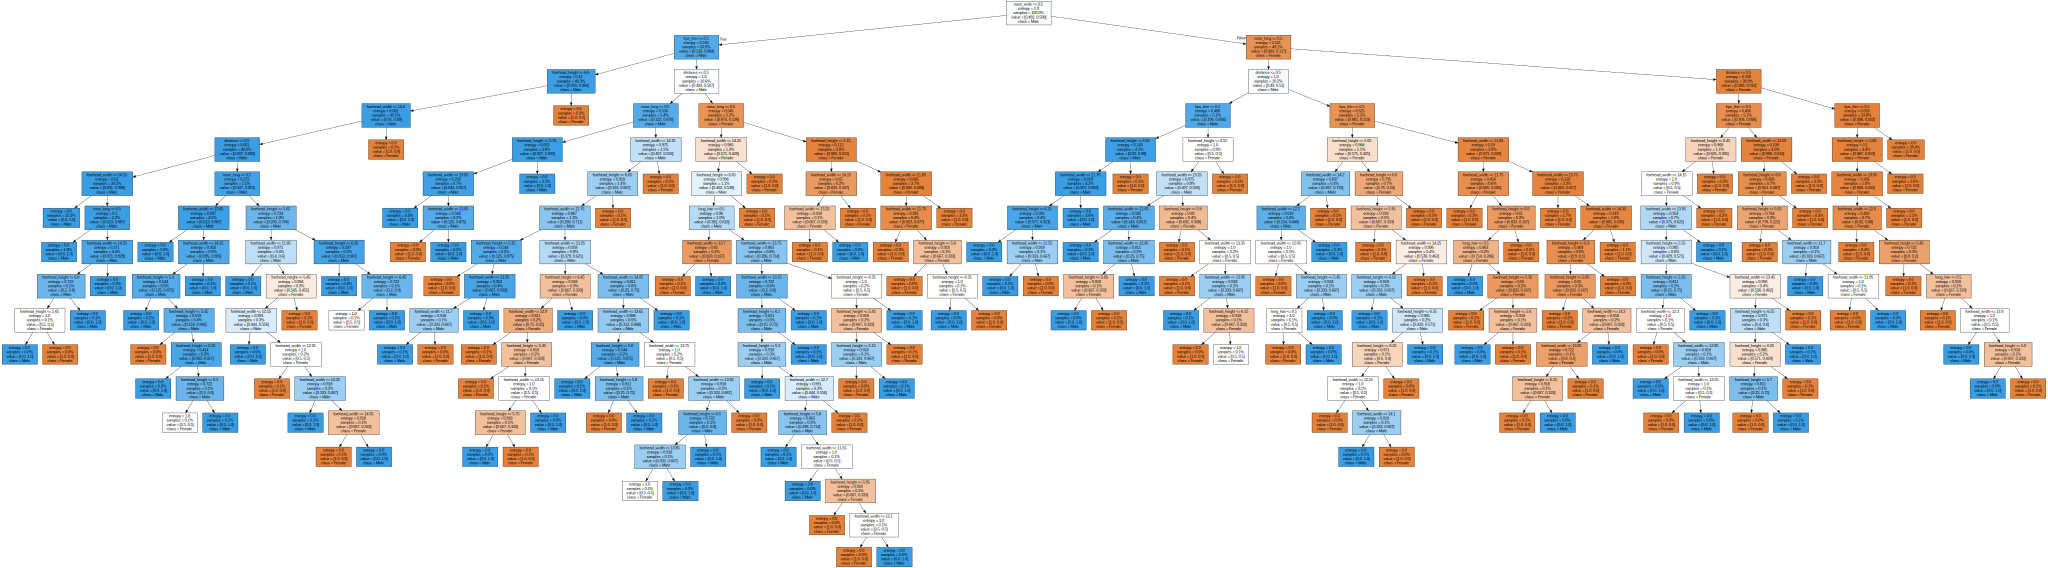

In [43]:
#tree.plot_tree(myTree)
feature_names=["long_hair","forehead_width","forehead_height","nose_wide","nose_long","lips_thin","distance"]
class_names=["Female","Male"]
myTreeData = tree.export_graphviz(myTree,feature_names=feature_names,
                                  class_names=class_names,
                                  filled=True, proportion=True)
graphData= graphviz.Source(myTreeData)
graphData

## Métricas para probar el modelo
Obtendremos algunos coeficientes que nos representarán el desempeño del modelo

In [71]:

print("Datos de entrenamiento")
y_pred =myTree.predict(x_train)
print('Error cuadrático medio : ', mean_squared_error(y_train, y_pred))
print("Puntaje: ",myTree.score(x_train,y_train))
print("r^2: ",r2_score(y_train,y_pred))
print(confusion_matrix(y_train,y_pred),"\n")

print("Datos de prueba")
y_pred =myTree.predict(x_test)
print('Error cuadrático medio : ', mean_squared_error(y_test, y_pred))
print("Puntaje: ",myTree.score(x_test,y_test))
print("r^2: ",r2_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


Datos de entrenamiento
Error cuadrático medio :  0.001142857142857143
Error medio absoluto :  0.001142857142857143
Puntaje:  0.9988571428571429
r^2:  0.9954274008431873
[[1722    0]
 [   4 1774]] 

Datos de prueba
Error cuadrático medio :  0.0392
Error medio absoluto :  0.0392
Puntaje:  0.9608
r^2:  0.8429873672121734
[[620  28]
 [ 21 581]]


Validación del modelo con pruebas puntuales

In [62]:
print("Datos de validación","\n")

x_val.reset_index(inplace=True, drop=True)
y_val.reset_index(inplace=True, drop=True)

predi= [x_val.loc[0]]
print("Probabilidad de predicción",myTree.predict_proba(predi))
print("Predicción: ",myTree.predict(predi))
print("Real :",y_val.loc[0],"\n")


predi= [x_val.loc[50]]
print("Probabilidad de predicción",myTree.predict_proba(predi))
print("Predicción: ",myTree.predict(predi))
print("Real :",y_val.loc[50],"\n")

predi= [x_val.loc[75]]
print("Probabilidad de predicción",myTree.predict_proba(predi))
print("Predicción: ",myTree.predict(predi))
print("Real :",y_val.loc[75],"\n")

predi= [x_val.loc[150]]
print("Probabilidad de predicción",myTree.predict_proba(predi))
print("Predicción: ",myTree.predict(predi))
print("Real :",y_val.loc[150],"\n")

predi= [x_val.loc[200]]
print("Probabilidad de predicción",myTree.predict_proba(predi))
print("Predicción: ",myTree.predict(predi))
print("Real :",y_val.loc[200])

Datos de validación 

Probabilidad de predicción [[1. 0.]]
Predicción:  [0]
Real : 0 

Probabilidad de predicción [[1. 0.]]
Predicción:  [0]
Real : 0 

Probabilidad de predicción [[0. 1.]]
Predicción:  [1]
Real : 1 

Probabilidad de predicción [[1. 0.]]
Predicción:  [0]
Real : 0 

Probabilidad de predicción [[1. 0.]]
Predicción:  [0]
Real : 0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with

Al ser un árbol demasiado grande, reduciremos los nodos que puedan usarse para ver si simplificando el modelo podemos conseguir iguales o mejores resultados

# Reducir nodos de árbol de decisión

In [47]:
#Reducir nodos
myTree2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
myTree2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

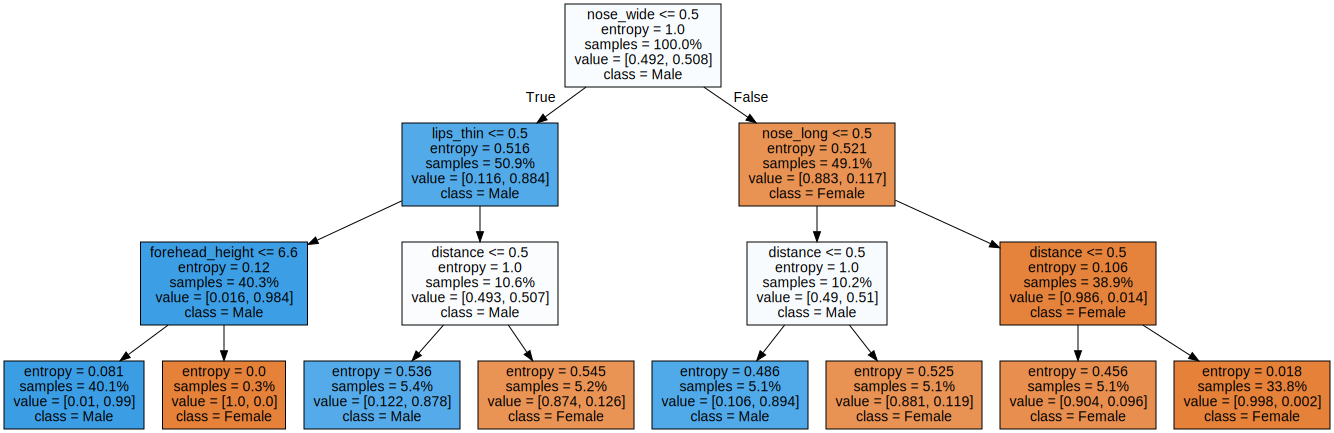

In [48]:
myTreeData = tree.export_graphviz(myTree2,feature_names=feature_names,
                                  class_names=class_names,
                                  filled=True, proportion=True)
graphData= graphviz.Source(myTreeData)
graphData

## Métricas para probar el modelo
Obtendremos algunos coeficientes que nos representarán el desempeño del modelo

In [73]:
print("Datos de entrenamiento")
y_pred =myTree2.predict(x_train)
print('Error cuadrático medio : ', mean_squared_error(y_train, y_pred))
print("Puntaje: ",myTree2.score(x_train,y_train))
print("r^2: ",r2_score(y_train,y_pred))
print(confusion_matrix(y_train,y_pred),"\n")

print("Datos de prueba")
y_pred =myTree2.predict(x_test)
print('Error cuadrático medio : ', mean_squared_error(y_test, y_pred))
print("Puntaje: ",myTree2.score(x_test,y_test))
print("r^2: ",r2_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Datos de entrenamiento
Error cuadrático medio :  0.034
Puntaje:  0.966
r^2:  0.8639651750848217
[[1666   56]
 [  63 1715]] 

Datos de prueba
Error cuadrático medio :  0.0416
Puntaje:  0.9584
r^2:  0.8333743488782248
[[620  28]
 [ 24 578]]


Validación del modelo con pruebas puntuales

In [60]:
print("Datos de validación","\n")

predi= [x_val.loc[0]]
print("Probabilidad de predicción",myTree2.predict_proba(predi))
print("Predicción: ",myTree2.predict(predi))
print("Real :",y_val.loc[0],"\n")


predi= [x_val.loc[50]]
print("Probabilidad de predicción",myTree2.predict_proba(predi))
print("Predicción: ",myTree2.predict(predi))
print("Real :",y_val.loc[50],"\n")

predi= [x_val.loc[75]]
print("Probabilidad de predicción",myTree2.predict_proba(predi))
print("Predicción: ",myTree2.predict(predi))
print("Real :",y_val.loc[75],"\n")

predi= [x_val.loc[150]]
print("Probabilidad de predicción",myTree2.predict_proba(predi))
print("Predicción: ",myTree2.predict(predi))
print("Real :",y_val.loc[150],"\n")

predi= [x_val.loc[200]]
print("Probabilidad de predicción",myTree2.predict_proba(predi))
print("Predicción: ",myTree2.predict(predi))
print("Real :",y_val.loc[200])

Datos de validación 

Probabilidad de predicción [[0.99830938 0.00169062]]
Predicción:  [0]
Real : 0 

Probabilidad de predicción [[0.99830938 0.00169062]]
Predicción:  [0]
Real : 0 

Probabilidad de predicción [[0.12234043 0.87765957]]
Predicción:  [1]
Real : 1 

Probabilidad de predicción [[0.99830938 0.00169062]]
Predicción:  [0]
Real : 0 

Probabilidad de predicción [[0.99830938 0.00169062]]
Predicción:  [0]
Real : 0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with

# Podar el árbol

El árbol tiene demasidas vertientes por lo que se reducirán también para ver si se puede obtener un resultado igual o mejor con un modelo aún más simplificado.

In [51]:
myTree3= tree.DecisionTreeClassifier(criterion="entropy")
pruning_data = myTree3.cost_complexity_pruning_path(x_train,y_train)
alphaValues = pruning_data.ccp_alphas
impurityValues = pruning_data.impurities

[0.9988571428571429, 0.9988571428571429, 0.9988571428571429, 0.9982857142857143, 0.9982857142857143, 0.9971428571428571, 0.9971428571428571, 0.9965714285714286, 0.9965714285714286, 0.9965714285714286, 0.9965714285714286, 0.9962857142857143, 0.9962857142857143, 0.9957142857142857, 0.9954285714285714, 0.9951428571428571, 0.9948571428571429, 0.994, 0.994, 0.9934285714285714, 0.9934285714285714, 0.9928571428571429, 0.9928571428571429, 0.9925714285714285, 0.992, 0.992, 0.992, 0.9914285714285714, 0.9914285714285714, 0.9905714285714285, 0.9891428571428571, 0.9891428571428571, 0.9891428571428571, 0.988, 0.988, 0.988, 0.9877142857142858, 0.9865714285714285, 0.9865714285714285, 0.9845714285714285, 0.9837142857142858, 0.9837142857142858, 0.9825714285714285, 0.9822857142857143, 0.9822857142857143, 0.982, 0.982, 0.9811428571428571, 0.9808571428571429, 0.9808571428571429, 0.9808571428571429, 0.9802857142857143, 0.9791428571428571, 0.9791428571428571, 0.9782857142857143, 0.9782857142857143, 0.9782857

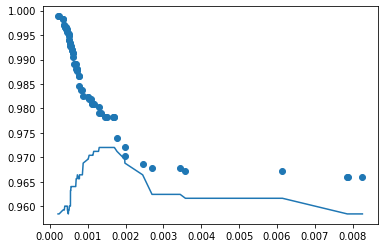

In [54]:
allTrees=[]

for thisAlpha in alphaValues:
  thisTree = tree.DecisionTreeClassifier(criterion="entropy",random_state=0,ccp_alpha=thisAlpha)

  thisTree.fit(x_train,y_train)
  allTrees.append(thisTree)

#Compare performance for eah tree
allTrainScores = []
allTestScores = []

for thisTree  in allTrees :
  allTrainScores.append(thisTree.score(x_train,y_train))
  allTestScores.append(thisTree.score(x_test,y_test))

print(allTrainScores)
print(allTestScores)
plt.scatter(alphaValues[1:70],allTrainScores[1:70])
plt.plot(alphaValues[1:70],allTestScores[1:70])



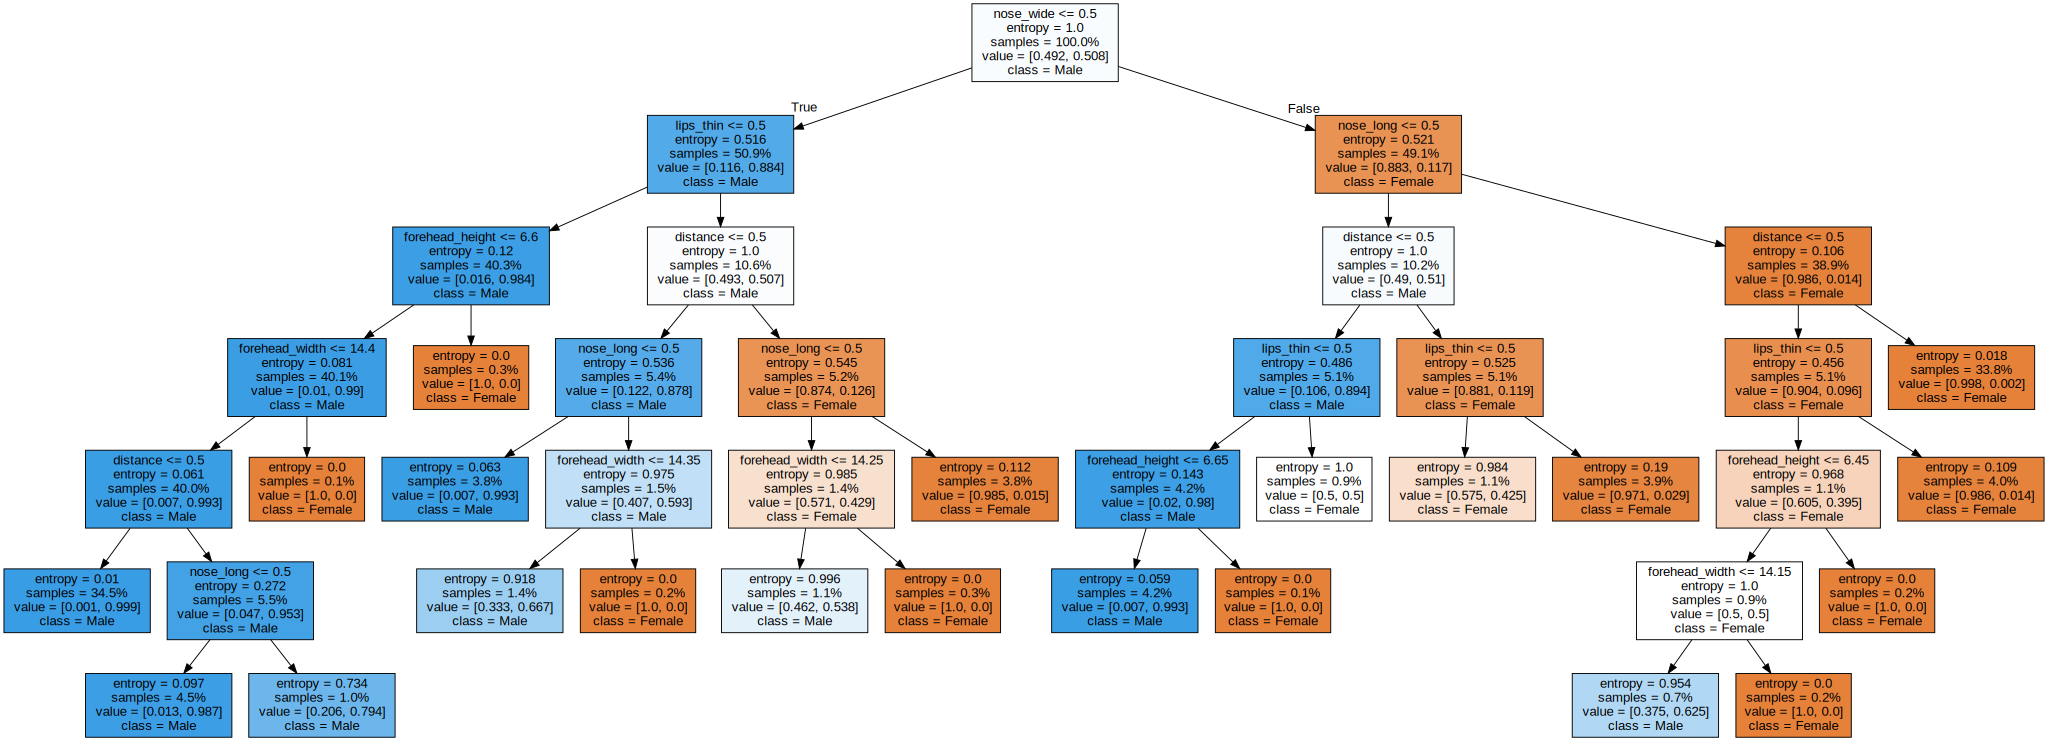

In [55]:
na=60 #alpha seleccionada para el árbol
finalTreeData=tree.export_graphviz(allTrees[na],feature_names=feature_names,
                                   class_names=class_names,
                                   filled=True, proportion=True)
graphData = graphviz.Source(finalTreeData)
graphData

## Métricas para probar el modelo
Obtendremos algunos coeficientes que nos representarán el desempeño del modelo

In [74]:
print("Datos de entrenamiento")
y_pred =allTrees[na].predict(x_train)
print('Error cuadrático medio : ', mean_squared_error(y_train, y_pred))
print("Puntaje: ",allTrees[na].score(x_train,y_train))
print("r^2: ",r2_score(y_train,y_pred))
print(confusion_matrix(y_train,y_pred),"\n")

print("Datos de prueba")
y_pred =allTrees[na].predict(x_test)
print('Error cuadrático medio : ', mean_squared_error(y_test, y_pred))
print("Puntaje: ",allTrees[na].score(x_test,y_test))
print("r^2: ",r2_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Datos de entrenamiento
Error cuadrático medio :  0.028
Puntaje:  0.972
r^2:  0.8879713206580885
[[1667   55]
 [  43 1735]] 

Datos de prueba
Error cuadrático medio :  0.0304
Puntaje:  0.9696
r^2:  0.8782351011033181
[[626  22]
 [ 16 586]]


Validación del modelo con pruebas puntuales

In [59]:
print("Datos de  validación","\n")

predi= [x_val.loc[0]]
print("Probabilidad de predicción",allTrees[na].predict_proba(predi))
print("Predicción: ",allTrees[na].predict(predi))
print("Real :",y_val.loc[0],"\n")


predi= [x_val.loc[50]]
print("Probabilidad de predicción",allTrees[na].predict_proba(predi))
print("Predicción: ",allTrees[na].predict(predi))
print("Real :",y_val.loc[50],"\n")

predi= [x_val.loc[75]]
print("Probabilidad de predicción",allTrees[na].predict_proba(predi))
print("Predicción: ",allTrees[na].predict(predi))
print("Real :",y_val.loc[75],"\n")

predi= [x_val.loc[150]]
print("Probabilidad de predicción",allTrees[na].predict_proba(predi))
print("Predicción: ",allTrees[na].predict(predi))
print("Real :",y_val.loc[150],"\n")

predi= [x_val.loc[200]]
print("Probabilidad de predicción",allTrees[na].predict_proba(predi))
print("Predicción: ",allTrees[na].predict(predi))
print("Real :",y_val.loc[200])



Datos de  validación 

Probabilidad de predicción [[0.99830938 0.00169062]]
Predicción:  [0]
Real : 0 

Probabilidad de predicción [[0.99830938 0.00169062]]
Predicción:  [0]
Real : 0 

Probabilidad de predicción [[0.00746269 0.99253731]]
Predicción:  [1]
Real : 1 

Probabilidad de predicción [[0.99830938 0.00169062]]
Predicción:  [0]
Real : 0 

Probabilidad de predicción [[0.99830938 0.00169062]]
Predicción:  [0]
Real : 0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with

# Conclusión
El modelo con mejor ajustes de datos y mejor desempeño de manera simplificada es el árbol obtenido después de la poda de nodos, ya que este demostró tener baja varianza, alto sesgo y tener un ajuste fit con los datos que se estudiaron.